## Implementation

In [15]:
from IOHMM import IOHMM_model
import numpy as np, pandas as pd
import torch
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("data/Financial-Data/stocks/TSLA.csv")
data.head()
data = data.dropna()

input = torch.tensor(np.array(data[['Open']]), dtype=torch.float32)
output = torch.tensor(np.array(data['Close']), dtype=torch.float32)

# Example 1

## Set up a simple model manully

In [17]:
xx=np.arange(0,100,0.1)
y= np.sin(xx)
x=torch.tensor(xx, dtype=torch.float32)
y=torch.tensor(y, dtype=torch.float32)
x=x.reshape(-1,1)

In [18]:
transition_matrix = torch.tensor([[[1.,0.],[1.,0.]],[[1.,0.],[1.,0.]]])
emission_matrix = torch.tensor([[-0.1,0.1],[0.1,0.1]])

IOHMM = IOHMM_model(num_states=2, inputs=input[:100], outputs=output[:100], max_iter=1000, tol=1e-4, transition_matrix=transition_matrix, emission_matrix=emission_matrix)
print(f"initial pi {IOHMM.initial_pi}")
print(IOHMM.transition_matrix)
print(IOHMM.emission_matrix)
print(IOHMM.lsd)

initial pi Parameter containing:
tensor([-0.6931, -0.6931], requires_grad=True)
Parameter containing:
tensor([[[1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.]]], requires_grad=True)
Parameter containing:
tensor([[-0.1000,  0.1000],
        [ 0.1000,  0.1000]], requires_grad=True)
Parameter containing:
tensor([1.6094, 1.6094], requires_grad=True)


In [19]:
print(IOHMM._forward())
# torch.sum(IOHMM._forward(), dim=1)

tensor([[0.5009, 0.4991],
        [0.5010, 0.4990],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5006, 0.4994],
        [0.5006, 0.4994],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5

In [20]:
print(IOHMM._backward())
# torch.sum(IOHMM._backward(), dim=1)

tensor([[0.5010, 0.4990],
        [0.5010, 0.4990],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5006, 0.4994],
        [0.5006, 0.4994],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5

In [21]:
print(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()))
# torch.sum(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()), dim=1)

tensor([[0.5009, 0.4991],
        [0.5010, 0.4990],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5006, 0.4994],
        [0.5006, 0.4994],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5009, 0.4991],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5007, 0.4993],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5008, 0.4992],
        [0.5

In [22]:
print(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()))
# torch.sum(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()), axis=1)

tensor([[[0.5016, 0.5016],
         [0.4984, 0.4984]],

        [[0.5016, 0.5016],
         [0.4984, 0.4984]],

        [[0.5014, 0.5014],
         [0.4986, 0.4986]],

        [[0.5012, 0.5013],
         [0.4988, 0.4987]],

        [[0.5010, 0.5010],
         [0.4990, 0.4990]],

        [[0.5010, 0.5011],
         [0.4990, 0.4989]],

        [[0.5012, 0.5012],
         [0.4988, 0.4988]],

        [[0.5012, 0.5012],
         [0.4988, 0.4988]],

        [[0.5011, 0.5011],
         [0.4989, 0.4989]],

        [[0.5012, 0.5012],
         [0.4988, 0.4988]],

        [[0.5013, 0.5013],
         [0.4987, 0.4987]],

        [[0.5013, 0.5013],
         [0.4987, 0.4987]],

        [[0.5014, 0.5014],
         [0.4986, 0.4986]],

        [[0.5015, 0.5015],
         [0.4985, 0.4985]],

        [[0.5013, 0.5013],
         [0.4987, 0.4987]],

        [[0.5013, 0.5013],
         [0.4987, 0.4987]],

        [[0.5014, 0.5014],
         [0.4986, 0.4986]],

        [[0.5014, 0.5014],
         [0.4986, 0.4

In [23]:
IOHMM._baum_welch()

Iteration 1, likelihood: -inf
Iteration 2, likelihood: -474.26922607421875
Iteration 3, likelihood: -7663739.0
Iteration 4, likelihood: -457.9735412597656
Iteration 5, likelihood: -457.5774230957031
Iteration 6, likelihood: -457.00823974609375
Iteration 7, likelihood: -456.4458312988281
Iteration 8, likelihood: -455.8875732421875
Iteration 9, likelihood: -455.3324890136719
Iteration 10, likelihood: -454.7795104980469
Iteration 11, likelihood: -454.22802734375
Iteration 12, likelihood: -453.677978515625
Iteration 13, likelihood: -453.1285400390625
Iteration 14, likelihood: -452.5801086425781
Iteration 15, likelihood: -452.03216552734375
Iteration 16, likelihood: -451.4847717285156
Iteration 17, likelihood: -450.937744140625
Iteration 18, likelihood: -450.39111328125
Iteration 19, likelihood: -449.8448791503906
Iteration 20, likelihood: -449.2987365722656
Iteration 21, likelihood: -448.75323486328125
Iteration 22, likelihood: -448.2082214355469
Iteration 23, likelihood: -447.664123535156

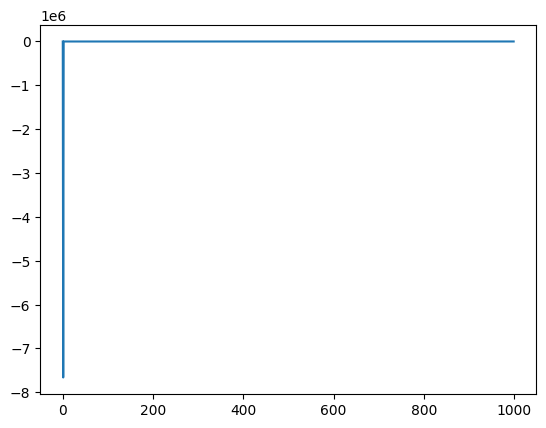

In [24]:
plt.plot(IOHMM.history)

## See the training results

In [25]:
print("Initial pi")
print(IOHMM.initial_pi) # to normalize
print("Transition matrix")
print(IOHMM.transition_matrix)
print("Emission matrix")
print(IOHMM.emission_matrix)
print("Sd")
print(IOHMM.lsd)

Initial pi
Parameter containing:
tensor([161.0615, 167.3607], requires_grad=True)
Transition matrix
Parameter containing:
tensor([[[-9.2187e+00, -6.3024e+00],
         [-9.3746e+00, -6.7766e+00]],

        [[-3.5827e+05, -2.7663e+03],
         [-4.0344e+05, -2.9514e+03]]], requires_grad=True)
Emission matrix
Parameter containing:
tensor([[-0.5575, -0.5222],
        [-0.4755, -0.5830]], requires_grad=True)
Sd
Parameter containing:
tensor([2.1689, 2.2598], requires_grad=True)


## Viterbi

In [26]:
#call the viterbi algorithm
IOHMM.viterbi()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

## Predict

In [27]:
# predict the next output given the next input
IOHMM.predict(input[11])


tensor(481994.9688, grad_fn=<SumBackward0>)

In [28]:
output[11]

tensor(1.3260)